<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week8/Day2/Exercises_XP/Exercises_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [20]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

Create a function preprocess_text() wich will receive the data as argument and:

* Convert all the text in lower case and tokanize it
* Remove punctuation
* Apply a lemmatizer
* Return the preprocessed strings


In [95]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
lower_data = []

#Tokenize the data inside the dictionary
tokens = [word_tokenize(doc) for doc in data['Review']]

# Punctuation to be removed
# stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

#convert it to lower case
for token in tokens:
    lower_data.extend([word.lower() for word in token if word.lower() not in punctuation])


print(lower_data)

['at', 'mcdonald', "'s", 'the', 'food', 'was', 'ok', 'and', 'the', 'service', 'was', 'bad', 'i', 'would', 'not', 'recommend', 'this', 'japanese', 'restaurant', 'to', 'anyone', 'i', 'loved', 'this', 'restaurant', 'when', 'i', 'traveled', 'to', 'thailand', 'last', 'summer', 'the', 'menu', 'of', 'loving', 'has', 'a', 'wide', 'variety', 'of', 'options', 'the', 'staff', 'was', 'friendly', 'and', 'helpful', 'at', 'google', "'s", 'employees', 'restaurant', 'the', 'ambiance', 'at', 'bella', 'italia', 'is', 'amazing', 'and', 'the', 'pasta', 'dishes', 'are', 'delicious', 'i', 'had', 'a', 'terrible', 'experience', 'at', 'pizza', 'hut', 'the', 'pizza', 'was', 'burnt', 'and', 'the', 'service', 'was', 'slow', 'the', 'sushi', 'at', 'sushi', 'express', 'is', 'always', 'fresh', 'and', 'flavorful', 'the', 'steakhouse', 'on', 'main', 'street', 'has', 'a', 'cozy', 'atmosphere', 'and', 'excellent', 'steaks', 'the', 'dessert', 'selection', 'at', 'sweet', 'treats', 'is', 'to', 'die', 'for']


In [ ]:
!pip install spacy
! python -m spacy download en_core_web_sm

In [87]:
lower_string=(' '.join(lower_data))

In [91]:
import spacy
#load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

#process the text using spaCy
doc = nlp(lower_string)

lemmatized = [token.lemma_ for token in doc]
print('Lemmatized: ', lemmatized)


Lemmatized:  ['at', 'mcdonald', "'s", 'the', 'food', 'be', 'ok', 'and', 'the', 'service', 'be', 'bad', 'I', 'would', 'not', 'recommend', 'this', 'japanese', 'restaurant', 'to', 'anyone', 'I', 'love', 'this', 'restaurant', 'when', 'I', 'travel', 'to', 'thailand', 'last', 'summer', 'the', 'menu', 'of', 'loving', 'have', 'a', 'wide', 'variety', 'of', 'option', 'the', 'staff', 'be', 'friendly', 'and', 'helpful', 'at', 'google', "'s", 'employee', 'restaurant', 'the', 'ambiance', 'at', 'bella', 'italia', 'be', 'amazing', 'and', 'the', 'pasta', 'dish', 'be', 'delicious', 'I', 'have', 'a', 'terrible', 'experience', 'at', 'pizza', 'hut', 'the', 'pizza', 'be', 'burn', 'and', 'the', 'service', 'be', 'slow', 'the', 'sushi', 'at', 'sushi', 'express', 'be', 'always', 'fresh', 'and', 'flavorful', 'the', 'steakhouse', 'on', 'main', 'street', 'have', 'a', 'cozy', 'atmosphere', 'and', 'excellent', 'steak', 'the', 'dessert', 'selection', 'at', 'sweet', 'treat', 'be', 'to', 'die', 'for']


# NER

2. Create a new dataset with the cleaned text

3. Create a function perform_ner() that will receive the text as argument and perform NER tagging on it. Use spacy en_core_web_sm



In [ ]:
clean_data = data.copy()

from nltk import pos_tag, ne_chunk

# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


In [110]:
punctuation = set(string.punctuation)

def  perform_ner(data):

  clean_tokens = []
  for doc in data:
      tokens = word_tokenize(doc)
      clean_tokens.extend([word for word in tokens if word not in punctuation])

  tagged_tokens = pos_tag(clean_tokens)
  named_entities = ne_chunk(tagged_tokens)

  for entity in named_entities:
        if hasattr(entity, 'label'):
            print(' '.join(child[0] for child in entity), entity.label())

perform_ner(clean_data['Review'])


McDonald ORGANIZATION
Japanese GPE
Thailand GPE
Loving GPE
Google ORGANIZATION
Bella Italia ORGANIZATION
Pizza ORGANIZATION
Sushi Express ORGANIZATION
Main Street FACILITY
Sweet Treats ORGANIZATION


# POS

4. Create a function perform_pos_tagging() that will receive the text as argument and perform POS tagging on it.



In [92]:
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [98]:
def  perform_pos_tagging(data):
  tagged = pos_tag(data)
  for word, tag in tagged:
      print(f'Word: {word}, POS: {tag}')

perform_pos_tagging(lower_data)

Word: at, POS: IN
Word: mcdonald, POS: NN
Word: 's, POS: POS
Word: the, POS: DT
Word: food, POS: NN
Word: was, POS: VBD
Word: ok, POS: JJ
Word: and, POS: CC
Word: the, POS: DT
Word: service, POS: NN
Word: was, POS: VBD
Word: bad, POS: JJ
Word: i, POS: NN
Word: would, POS: MD
Word: not, POS: RB
Word: recommend, POS: VB
Word: this, POS: DT
Word: japanese, POS: JJ
Word: restaurant, POS: NN
Word: to, POS: TO
Word: anyone, POS: NN
Word: i, POS: NN
Word: loved, POS: VBD
Word: this, POS: DT
Word: restaurant, POS: NN
Word: when, POS: WRB
Word: i, POS: NN
Word: traveled, POS: VBD
Word: to, POS: TO
Word: thailand, POS: VB
Word: last, POS: JJ
Word: summer, POS: NN
Word: the, POS: DT
Word: menu, POS: NN
Word: of, POS: IN
Word: loving, POS: NN
Word: has, POS: VBZ
Word: a, POS: DT
Word: wide, POS: JJ
Word: variety, POS: NN
Word: of, POS: IN
Word: options, POS: NNS
Word: the, POS: DT
Word: staff, POS: NN
Word: was, POS: VBD
Word: friendly, POS: JJ
Word: and, POS: CC
Word: helpful, POS: JJ
Word: at, P

5. Let’s apply the functions in the dataset, analyse the outputs applying it in the preprocessed data and in the raw data

In [116]:
print("For RAW DATA\n","*"*30)
print(perform_ner(clean_data['Review']))
print("*"*30)
print(perform_pos_tagging(clean_data['Review']))
print("For preprocessed\n","*"*30)
print(perform_ner(lower_data))
print("*"*30)
print(perform_pos_tagging(lower_data))

For RAW DATA
 ******************************
McDonald ORGANIZATION
Japanese GPE
Thailand GPE
Loving GPE
Google ORGANIZATION
Bella Italia ORGANIZATION
Pizza ORGANIZATION
Sushi Express ORGANIZATION
Main Street FACILITY
Sweet Treats ORGANIZATION
None
******************************
Word: At McDonald's the food was ok and the service was bad., POS: NNP
Word: I would not recommend this Japanese restaurant to anyone., POS: NNP
Word: I loved this restaurant when I traveled to Thailand last summer., POS: NNP
Word: The menu of Loving has a wide variety of options., POS: NNP
Word: The staff was friendly and helpful at Google's employees restaurant., POS: NNP
Word: The ambiance at Bella Italia is amazing, and the pasta dishes are delicious., POS: NNP
Word: I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow., POS: NNP
Word: The sushi at Sushi Express is always fresh and flavorful., POS: NNP
Word: The steakhouse on Main Street has a cozy atmosphere and excellent 

# Exercise 2: Plotting The Word Embeddings

In [ ]:
! pip install nltk gensim

In [113]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import gensim.downloader as api
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
# Train Word2Vec model
model = Word2Vec(sentences=tokens, vector_size=100, window=3, min_count=1, workers=6)

# Access dimensions of the Word2Vec object
vector_dimensions = model.wv.vector_size

# Print dimensions
print("Vector dimensions:", vector_dimensions)

Vector dimensions: 100


The vector dimensions represent the size of the word vectors learned by the Word2Vec model. Each word in the vocabulary will be represented as a dense vector of this size. A larger vector size typically captures more semantic information about words but requires more computational resources.

 Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot.

Not using "most_similar" function

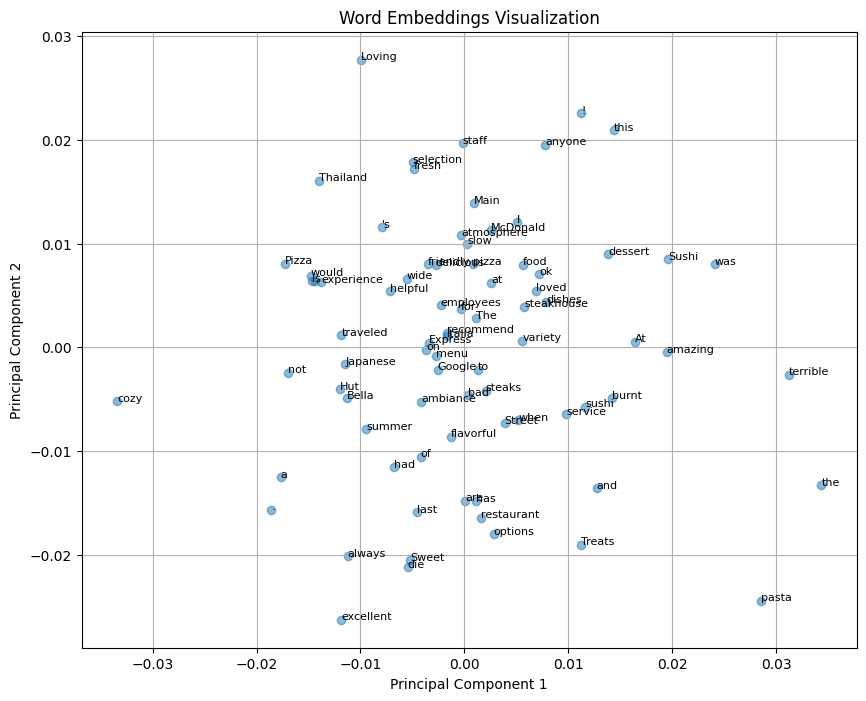

In [123]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_word_embeddings(model):
  # Extract word vectors and corresponding words from the model
    word_vectors = model.wv.vectors
    words = model.wv.index_to_key
 # Reduce dimensionality of word vectors for visualization
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=8)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Word Embeddings Visualization')
    plt.grid(True)
    plt.show()


plot_word_embeddings(model)

I can not see any related words, maybe because the way how this is ploted doesn't show the context of the phrase were the word comes from

Using the "most_similar" function

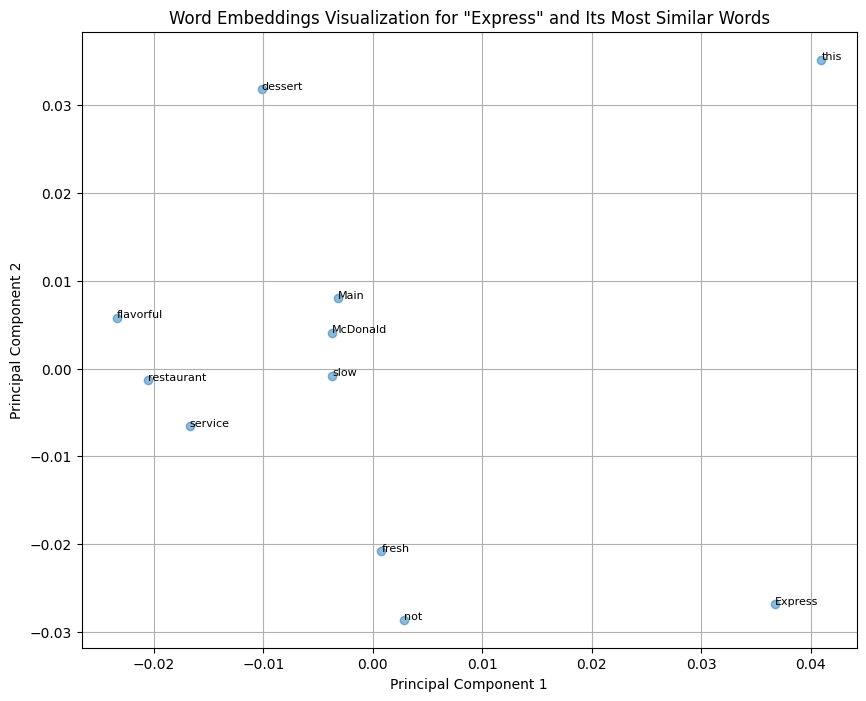

In [127]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_word_embeddings(model, word):
    # Extract word vectors and corresponding words from the model
    word_vectors = [model.wv[word]] + [model.wv[sim_word] for sim_word, _ in model.wv.most_similar(word)]
    words = [word] + [sim_word for sim_word, _ in model.wv.most_similar(word)]

    # Reduce dimensionality of word vectors for visualization
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    # Plot word embeddings
    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=8)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Word Embeddings Visualization for "{word}" and Its Most Similar Words')
    plt.grid(True)
    plt.show()

# Example usage
word_to_plot = 'McDonald'
plot_word_embeddings(model, word_to_plot)


here we can see some kind of correlation between the words, a reason for this can be that because we are  examining the learned semantic relationships encoded in the word vectors.